In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df1 = pd.read_csv('C:\\Users\\Dell\\Desktop\\Next Hikes Project_5\\finel_data.csv')
df1

,Unnamed: 0,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,email,google,youtube,netflix,gaming,other,total_tp,total_rtt,total_tcp,Decile_rank
0,0,770.0000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.000000,...,3.701304e+06,2.905912e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08,67.000000,47.000000,2.156957e+07,4
1,1,235.0000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.000000,...,9.373850e+05,4.414096e+06,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08,42.000000,70.000000,2.156957e+07,4
2,2,1.0000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,109.795706,17.662883,6.000000,...,3.363124e+06,1.022912e+07,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08,15.000000,127.458589,2.156957e+07,4
3,3,486.0000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,109.795706,17.662883,44.000000,...,2.070983e+06,1.181176e+07,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08,88.000000,127.458589,2.156957e+07,4
4,4,565.0000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,109.795706,17.662883,6.000000,...,2.110349e+06,7.748843e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08,15.000000,127.458589,2.156957e+07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,451.0000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,32.000000,0.000000,52.000000,...,6.908760e+05,1.278491e+07,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07,117.000000,32.000000,2.156957e+07,1
149997,149997,483.0000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,27.000000,2.000000,23.000000,...,2.121718e+06,4.415361e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08,77.000000,29.000000,2.156957e+07,3
149998,149998,283.0000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,43.000000,6.000000,43.000000,...,2.058277e+06,6.585469e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08,90.000000,49.000000,2.156957e+07,3
149999,149999,696.0000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,37.000000,5.000000,34.000000,...,2.850914e+06,7.757267e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08,71.000000,42.000000,2.156957e+07,3


In [3]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df1.shape

(150001, 68)

Task 4 - Satisfaction Analysis

Task 4. 1 - Write a Python program to assign:
* engagement score to each user. Consider the engagement score as the
Euclidean distance between the user data point & the less engaged cluster
(use the first clustering for this) (Euclidean Distance)


In [5]:
norm_agg_user_data =pd.read_csv('C:\\Users\\Dell\\Desktop\\Next Hikes Project_5\\norm_agg_user_data.csv')

In [6]:
norm_agg_user_data

,MSISDN/Number,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
0,3.360100e+10,0.693147,18.575290,20.593943,0
1,3.360100e+10,0.693147,19.015283,18.870862,0
2,3.360100e+10,0.693147,18.720558,20.205695,0
3,3.360101e+10,0.693147,17.725091,19.861276,2
4,3.360101e+10,1.098612,17.429248,21.099927,2
...,...,...,...,...,...
106852,3.379000e+10,0.693147,18.764190,19.989937,0
106853,4.188282e+10,6.972606,25.007563,26.999429,1
106854,3.197021e+12,0.693147,20.592457,19.262782,1
106855,3.370000e+14,0.693147,19.349019,20.206234,1


In [7]:
# the results of the 1st clustering
norm_agg_user_data.head()

,MSISDN/Number,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
0,3.360100e+10,0.693147,18.575290,20.593943,0
1,3.360100e+10,0.693147,19.015283,18.870862,0
2,3.360100e+10,0.693147,18.720558,20.205695,0
3,3.360101e+10,0.693147,17.725091,19.861276,2
4,3.360101e+10,1.098612,17.429248,21.099927,2


In [8]:
norm_agg_user_data.shape

(106857, 5)

In [9]:
# Identifying the least engaged cluster
norm_agg_user_data.value_counts()

MSISDN/Number  sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
3.360100e+10   0.693147       18.575290              20.593943                0           1
3.366914e+10   0.693147       17.214016              19.535278                2           1
3.366916e+10   1.098612       19.683381              21.091022                1           1
               0.693147       18.699566              20.303314                0           1
                              18.286024              20.555715                0           1
                                                                                         ..
3.365940e+10   1.098612       19.319410              20.809013                1           1
               0.693147       17.826383              20.636837                2           1
               1.098612       18.967644              20.536404                1           1
               0.693147       16.997399              20.282029                2      

* engagement_score = euclidean_dist between a datapoint and cluster's 2 centroid.

In [10]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
alldistances = km.fit_transform(norm_agg_user_data) #returns euclidean distance btwn all datapoints and each cluster centroid

dist_df = pd.DataFrame(alldistances)
dist_2 = dist_df.iloc[:, 0].to_list() #pick out the centroid 2 distances
print(len(dist_2))
dist_2[:10]

106857


[102851035.98137571,
 102851003.98088163,
 102850246.98128393,
 102844925.98188867,
 102844140.98200877,
 102842075.98110524,
 102841123.98164275,
 102840798.9811807,
 102838063.98130871,
 102832451.98204325]

 add the distances as engagement score column

In [11]:
norm_agg_user_data['engagement_score'] = dist_2
eng_scores_data = norm_agg_user_data
eng_scores_data.head()

,MSISDN/Number,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters,engagement_score
0,3.360100e+10,0.693147,18.575290,20.593943,0,1.028510e+08
1,3.360100e+10,0.693147,19.015283,18.870862,0,1.028510e+08
2,3.360100e+10,0.693147,18.720558,20.205695,0,1.028502e+08
3,3.360101e+10,0.693147,17.725091,19.861276,2,1.028449e+08
4,3.360101e+10,1.098612,17.429248,21.099927,2,1.028441e+08


Note:-experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster.

In [12]:
net_data = pd.read_csv('C:\\Users\\Dell\\Desktop\\Next Hikes Project_5\\net_data.csv')

In [13]:
net_data

,Unnamed: 0,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,23.000000,44.000000,2.080991e+07,759658.664811
1,1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,16.000000,26.000000,2.080991e+07,759658.664811
2,2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,6.000000,9.000000,2.080991e+07,759658.664811
3,3,3.375034e+10,undefined,109.795706,17.662883,44.000000,44.000000,2.080991e+07,759658.664811
4,4,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,6.000000,9.000000,2.080991e+07,759658.664811
...,...,...,...,...,...,...,...,...,...
149996,149996,3.365069e+10,Apple iPhone 8 Plus (A1897),32.000000,0.000000,52.000000,65.000000,2.080991e+07,759658.664811
149997,149997,3.366345e+10,Apple iPhone Se (A1723),27.000000,2.000000,23.000000,54.000000,2.080991e+07,759658.664811
149998,149998,3.362189e+10,Apple iPhone Xs (A2097),43.000000,6.000000,43.000000,47.000000,2.080991e+07,759658.664811
149999,149999,3.361962e+10,Huawei Fig-Lx1,37.000000,5.000000,34.000000,37.000000,2.080991e+07,759658.664811


In [14]:
# picking out the 4 cols
exp_data = net_data.drop(['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 
                          'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'], axis = 1)
exp_data.head()

,Unnamed: 0,MSISDN/Number,Handset Type
0,0,3.366496e+10,Samsung Galaxy A5 Sm-A520F
1,1,3.368185e+10,Samsung Galaxy J5 (Sm-J530)
2,2,3.376063e+10,Samsung Galaxy A8 (2018)
3,3,3.375034e+10,undefined
4,4,3.369980e+10,Samsung Sm-G390F


In [15]:
# groupby user
agg_exp_data = exp_data.groupby('MSISDN/Number').agg({'Handset Type':'count', 'total_tp(kbps)':'sum', 'total_rtt(ms)':'sum', 'total_tcp(bytes)':'sum'})
agg_exp_data.head()

KeyError: "Column(s) ['total_rtt(ms)', 'total_tcp(bytes)', 'total_tp(kbps)'] do not exist"

In [ ]:
# normalize and perform kmeans
norm_agg_exp_data = np.log1p(agg_exp_data)
norm_agg_exp_data.head()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes)
MSISDN/Number,,,,
3.360100e+10,0.693147,4.343805,3.850148,16.886794
3.360100e+10,0.693147,4.605170,3.465736,16.886794
3.360100e+10,0.693147,4.584967,4.855607,16.886794
3.360101e+10,0.693147,5.517453,4.442651,13.542028
3.360101e+10,1.098612,10.948084,4.787492,17.247574


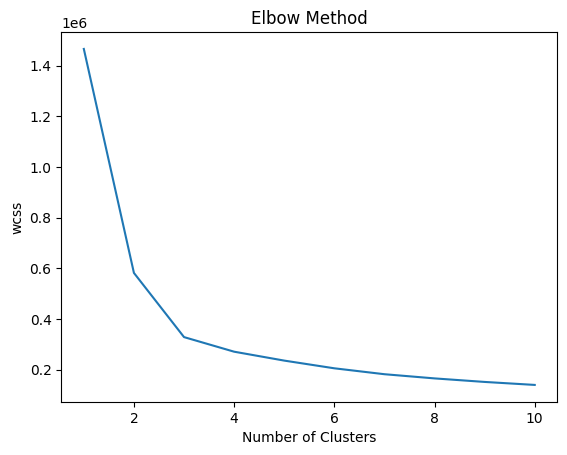

In [ ]:
# determining number of clusters using elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(norm_agg_exp_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

* k = 3

In [ ]:
# fit kmeans and identify least engaged cluster
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
k_means.fit(norm_agg_exp_data)
clusters=k_means.predict(norm_agg_exp_data)

norm_agg_exp_data['clusters'] = clusters
norm_agg_exp_data.clusters.value_counts()

clusters
1    57867
0    28928
2    20062
Name: count, dtype: int64

Note:-cluster 2 has the least. *** exp_score = euclidean distance between datapoints and cluster 1's centroid**

In [ ]:
# fit kmeans


km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
alldistances = km.fit_transform(norm_agg_user_data) #returns euclidean distance btwn all datapoints to each cluster centroid

dist_df = pd.DataFrame(alldistances)
dist_0 = dist_df.iloc[:, 2].to_list() #pick out the centroid 0 distances
print(len(dist_0))
dist_0[:10]

106857


[476542358401282.1,
 476542358401282.1,
 476542358401282.1,
 476542358401282.1,
 476542358401282.1,
 476542358401282.1,
 476542358401282.1,
 476542358401282.1,
 476542358401282.1,
 476542358401282.1]

In [ ]:
# add the scores to the df
norm_agg_exp_data['experience_score'] = dist_0
exp_scores_data = norm_agg_exp_data.drop(['clusters'], axis = 1)
exp_scores_data.tail()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),experience_score
MSISDN/Number,,,,,
3.379000e+10,0.693147,4.762174,3.713572,16.886794,4.765422e+14
4.188282e+10,6.204558,16.710219,12.705414,23.619449,4.765308e+14
3.197021e+12,0.693147,0.693147,4.855607,16.886794,4.720688e+14
3.370000e+14,0.693147,3.526361,4.855607,16.886794,0.000000e+00
8.823971e+14,0.693147,1.098612,4.855607,16.886794,7.713079e+14


In [ ]:
print(exp_scores_data.shape)
print(eng_scores_data.shape)

(106857, 5)
(106857, 5)


Merge the engagement and experience datasets

In [ ]:
exp_scores_data = exp_scores_data.reset_index()
eng_scores_data = eng_scores_data.reset_index()
avg_score_df = pd.merge(left = exp_scores_data, right = eng_scores_data, left_on = 'MSISDN/Number', right_on = 'MSISDN/Number')
print(avg_score_df.shape)
avg_score_df.tail()

(106857, 11)


,MSISDN/Number,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),experience_score,index,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),engagement_score
106852,3.379000e+10,0.693147,4.762174,3.713572,16.886794,4.765422e+14,106852,0.693147,18.764190,19.989937,8.614449e+07
106853,4.188282e+10,6.204558,16.710219,12.705414,23.619449,4.765308e+14,106853,6.972606,25.007563,26.999429,8.178967e+09
106854,3.197021e+12,0.693147,0.693147,4.855607,16.886794,4.720688e+14,106854,0.693147,20.592457,19.262782,3.163317e+12
106855,3.370000e+14,0.693147,3.526361,4.855607,16.886794,0.000000e+00,106855,0.693147,19.349019,20.206234,3.369663e+14
106856,8.823971e+14,0.693147,1.098612,4.855607,16.886794,7.713079e+14,106856,0.693147,20.583825,18.751089,8.823634e+14


In [ ]:
#calculate the average score
avg_score_df['satisfaction_score'] = (avg_score_df['experience_score'] + avg_score_df['engagement_score'])/2
avg_score_df.head()

,MSISDN/Number,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),experience_score,index,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),engagement_score,satisfaction_score
0,3.360100e+10,0.693147,4.343805,3.850148,16.886794,4.765424e+14,0,0.693147,18.575290,20.593943,1.028510e+08,2.382712e+14
1,3.360100e+10,0.693147,4.605170,3.465736,16.886794,4.765424e+14,1,0.693147,19.015283,18.870862,1.028510e+08,2.382712e+14
2,3.360100e+10,0.693147,4.584967,4.855607,16.886794,4.765424e+14,2,0.693147,18.720558,20.205695,1.028502e+08,2.382712e+14
3,3.360101e+10,0.693147,5.517453,4.442651,13.542028,4.765424e+14,3,0.693147,17.725091,19.861276,1.028449e+08,2.382712e+14
4,3.360101e+10,1.098612,10.948084,4.787492,17.247574,4.765424e+14,4,1.098612,17.429248,21.099927,1.028441e+08,2.382712e+14


*** Top 10 most satisfied users

[Text(0.5, 1.0, 'Top 10 Most satisfied users'), Text(0.5, 0, 'users')]

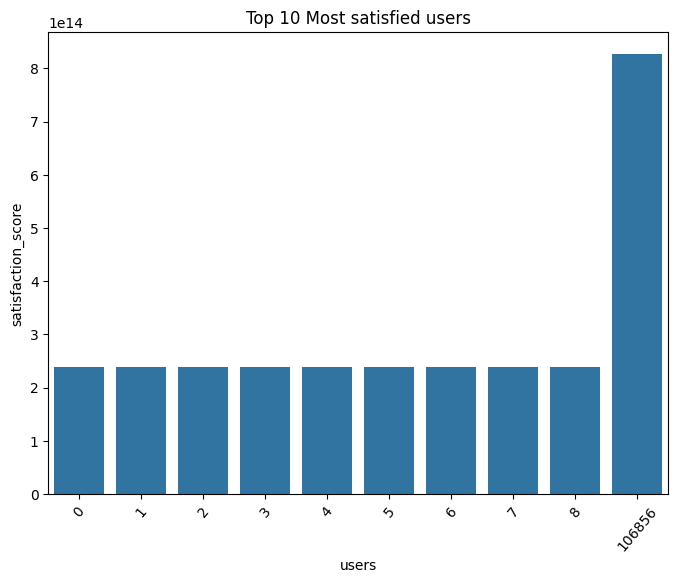

In [ ]:
a = avg_score_df.sort_values(by = 'satisfaction_score', ascending = False).head(10)
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['satisfaction_score']).set(title = 'Top 10 Most satisfied users', xlabel = 'users')

### Run a regression model of your choice to predict the satisfaction score of a customer.

Working with the 4 features from the average_score df

In [ ]:
all_variables = avg_score_df[['MSISDN/Number','engagement_score', 'experience_score', 'satisfaction_score']]
all_variables.head()

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,1.028510e+08,4.765424e+14,2.382712e+14
1,3.360100e+10,1.028510e+08,4.765424e+14,2.382712e+14
2,3.360100e+10,1.028502e+08,4.765424e+14,2.382712e+14
3,3.360101e+10,1.028449e+08,4.765424e+14,2.382712e+14
4,3.360101e+10,1.028441e+08,4.765424e+14,2.382712e+14


In [ ]:
# # features transformations
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['Handset Type', 'total_tp(kbps)', 'total_rtt(ms)','total_tcp(bytes)', 'experience_score', 'sessions_freq',
               'sessions_duration(ms)', 'sessions_traffic(bytes)', 'engagement_score','satisfaction_score']

all_variables = logs(avg_score_df, log_features)
all_variables.head(2)

,MSISDN/Number,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),experience_score,index,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),...,Handset Type_log,total_tp(kbps)_log,total_rtt(ms)_log,total_tcp(bytes)_log,experience_score_log,sessions_freq_log,sessions_duration(ms)_log,sessions_traffic(bytes)_log,engagement_score_log,satisfaction_score_log
0,3.360100e+10,0.693147,4.343805,3.850148,16.886794,4.765424e+14,0,0.693147,18.575290,20.593943,...,0.532478,1.677808,1.581069,2.884622,33.797578,0.532478,2.974779,3.072876,18.448792,33.104431
1,3.360100e+10,0.693147,4.605170,3.465736,16.886794,4.765424e+14,1,0.693147,19.015283,18.870862,...,0.532478,1.725472,1.498671,2.884622,33.797578,0.532478,2.996996,2.989758,18.448792,33.104431


In [ ]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
       res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
       res.columns.values[m] = l + '_sq'
       m += 1
       return res 

squared_features = ['Handset Type', 'total_tp(kbps)', 'total_rtt(ms)','total_tcp(bytes)', 'experience_score', 'sessions_freq',
                    'sessions_duration(ms)', 'sessions_traffic(bytes)', 'engagement_score','satisfaction_score']

all_variables = squares(all_variables, squared_features)
print(all_variables.shape)
all_variables.head(2)

(106857, 23)


,MSISDN/Number,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),experience_score,index,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),...,total_tp(kbps)_log,total_rtt(ms)_log,total_tcp(bytes)_log,experience_score_log,sessions_freq_log,sessions_duration(ms)_log,sessions_traffic(bytes)_log,engagement_score_log,satisfaction_score_log,Handset Type_sq
0,3.360100e+10,0.693147,4.343805,3.850148,16.886794,4.765424e+14,0,0.693147,18.575290,20.593943,...,1.677808,1.581069,2.884622,33.797578,0.532478,2.974779,3.072876,18.448792,33.104431,0.480453
1,3.360100e+10,0.693147,4.605170,3.465736,16.886794,4.765424e+14,1,0.693147,19.015283,18.870862,...,1.725472,1.498671,2.884622,33.797578,0.532478,2.996996,2.989758,18.448792,33.104431,0.480453


In [ ]:
# split  dataset into train and test sets
from sklearn.model_selection import train_test_split

x = all_variables.drop(['satisfaction_score'], axis = 1)
y = all_variables[['satisfaction_score']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = 0)
print('xtrain shape:', x_train.shape)
print('xtest shape:', x_test.shape)
print('ytrain shape:', y_train.shape)
print('ytest shape:', y_test.shape)

xtrain shape: (74799, 22)
xtest shape: (32058, 22)
ytrain shape: (74799, 1)
ytest shape: (32058, 1)


In [ ]:
# drop the user column from the xtrain. Save it in another df from the xtest set
x_train = x_train.drop(['MSISDN/Number'], axis = 1)
test_user = x_test[['MSISDN/Number']]
x_test = x_test.drop(['MSISDN/Number'], axis = 1)
print('xtrain shape:', x_train.shape)
print('xtest shape:', x_test.shape)
print('users df shape:', test_user.shape)

xtrain shape: (74799, 21)
xtest shape: (32058, 21)
users df shape: (32058, 1)


In [ ]:
#pip install xgboost

In [ ]:
import xgboost as xgb 

In [ ]:
# Models hyperparameters tuning
# I intend to observe the performance of 3 models (2 boosters and one ensemble method) then use the one with the lowest MSE score to predict the x_test set.

# Random Forest
regressor = RandomForestRegressor(n_estimators=300, random_state=0)


#gradboost
gdb = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)


#xgboost
xgb = xgb.XGBRegressor(colsample_bytree=0.4603, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=0,
                             random_state =0, nthread = -1)



In [ ]:
from sklearn.model_selection import KFold
KFold

sklearn.model_selection._split.KFold

In [ ]:
# # fitting and observing performannce through

# # score
# n_folds = 5
# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
#     rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)

In [ ]:
# score = rmsle_cv(xgb)
# print("\nExtreme grad boostscore: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# score = rmsle_cv(regressor)
# print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# score = rmsle_cv(gdb)
# print("\nGrad Boost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# l = [0.0012, 0.0000, 0.0037]
# c = ['xgb', 'random forest', 'gradboost']
# df = pd.DataFrame(l, index = c)
# sns.barplot(x = df.index, y = df[0])

In [ ]:
# rf prediction
regressor.fit(x_train.values, y_train)
rf_pred = regressor.predict(x_test.values)

In [ ]:
# xgb prediction
xgb.fit(x_train.values, y_train)
xgb_pred = xgb.predict(x_test.values)

In [ ]:
# gdb prediction
gdb.fit(x_train.values, y_train)
gdb_pred = gdb.predict(x_test.values)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error for random forest on test data =", mean_absolute_error(y_test, rf_pred))
print("Mean absolute error for xgboost on test data=", mean_absolute_error(y_test, xgb_pred))
print("Mean absolute error for gradboost on test data=", mean_absolute_error(y_test, gdb_pred))

print("\nMean squared error for random forest on test data =", mean_squared_error(y_test, rf_pred))
print("Mean squared error for xgboost on test data=", mean_squared_error(y_test, xgb_pred))
print("Mean squared error for gradboost on test data=", mean_squared_error(y_test, gdb_pred))

Mean absolute error for random forest on test data = 5416544644.072809
Mean absolute error for xgboost on test data= 2192258273.649677
Mean absolute error for gradboost on test data= 2177077580.0993648

Mean squared error for random forest on test data = 9.172625428678981e+23
Mean squared error for xgboost on test data= 1.4909809003772816e+23
Mean squared error for gradboost on test data= 1.519235453409322e+23


Note:-Working with the randomforest predictions since it has the smallest mean squared error.

In [ ]:
# save predictions.
predictions = pd.DataFrame()
predictions['users'] = test_user['MSISDN/Number']
predictions['satisfaction_score'] = rf_pred
print(predictions.shape)
predictions.head()

(32058, 2)


,users,satisfaction_score
19972,3.364241e+10,2.382712e+14
89092,3.369960e+10,2.382712e+14
60375,3.366554e+10,2.382712e+14
103158,3.377736e+10,2.382712e+14
106785,3.378954e+10,2.382712e+14


### Run a k-means (k=2) on the engagement & the experience score.

In [ ]:
ds = avg_score_df[['MSISDN/Number', 'engagement_score', 'experience_score']]

# no need for standardization (same unit if measurement)
k_means = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
k_means.fit(ds)
clusters=k_means.predict(ds)

ds['clusters'] = clusters
ds.tail()

,MSISDN/Number,engagement_score,experience_score,clusters
106852,3.379000e+10,8.614449e+07,4.765422e+14,0
106853,4.188282e+10,8.178967e+09,4.765308e+14,0
106854,3.197021e+12,3.163317e+12,4.720688e+14,0
106855,3.370000e+14,3.369663e+14,0.000000e+00,0
106856,8.823971e+14,8.823634e+14,7.713079e+14,1


### Aggregate the average engagement & experience score per cluster.

In [ ]:
cluster_agg = ds.groupby('clusters').agg({'experience_score':'mean', 'engagement_score':'mean'})
cluster_agg

,experience_score,engagement_score
clusters,,
0,4.765378e+14,3.232405e+09
1,7.713079e+14,8.823634e+14
